# 독립동일분포
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수

In [82]:
from IPython.display import Image #주피터 노트북에 이미지 삽입

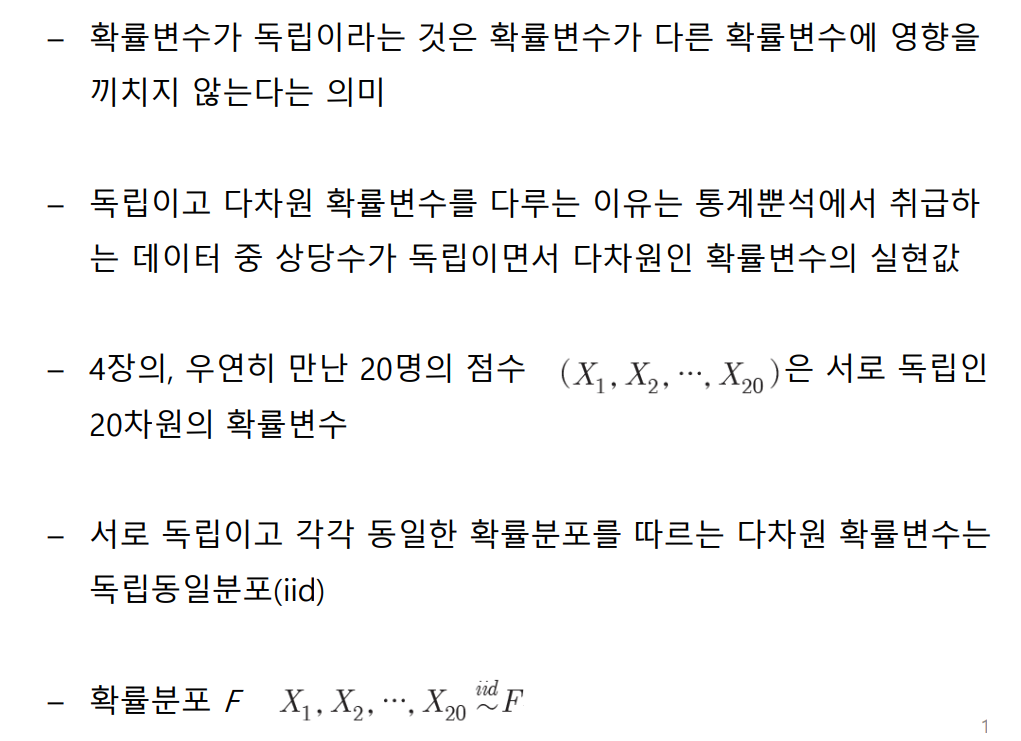

In [83]:
Image('capture_img/ch09_01.png')

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [85]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 독립성

### 독립성의 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음
- 2차원 확률변수 의 경우, 다음 관계가 성립하면 X와 Y는 독립 (아래 사진)
- 확률변수가 독립일 때 결합확률은 주변확률의 곱

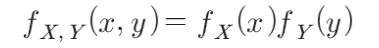

In [86]:
Image('capture_img/ch09_02.png')

- 예시 및 정의

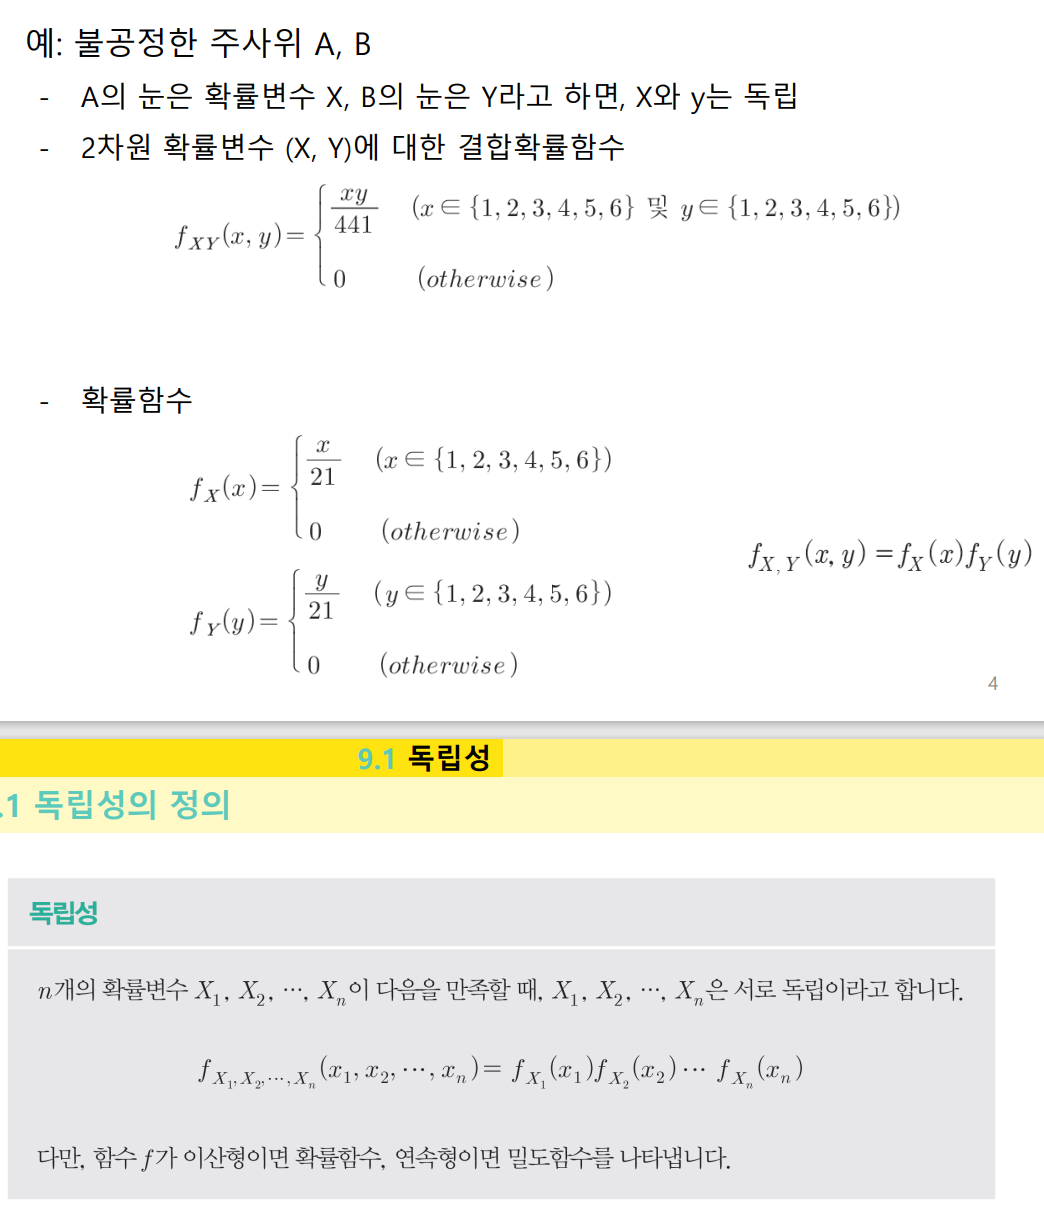

In [87]:
Image('capture_img/ch09_03.png')

### 독립성과 무상관성
- 독립성과 무상관성 모두 두 확률변수가 서로 관계가 없다는 것
- 독립성이 무상관성보다 더욱 강한 개념
- 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이지만, X와 Y가 무상관이라고 해서 X와 Y가 반드시 독립인 것은 아님


In [88]:
# 불공정한 주사위를 예로 들어 

x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

# X와 Y는 독립이므로 무상관
# 공분산이 0 이므로 무상관 이라는데,,, 왜? -8 이지 않나?

In [89]:
Cov(XY)

-8.326672684688674e-17

In [90]:
# 무상관인데 독립이 아닌 예
# 독립성이 무상관성보다 더욱 강한 개념

# 취할 수 있는 값의 조합
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

# (X,Y)의 결합확률함수
def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [91]:
Cov(XY)
#공분산이 0이므로 X와 Y는 무상관

0.0

In [92]:
# X와  Y가 독립인지 확인해보자
f_X(0) * f_Y(0), f_XY(0, 0)

# 결과값이 서로 다르다. 그러므로 X와Y는 독립이 아니다.

(0.1111111111111111, 0.333)

## 합의 분포

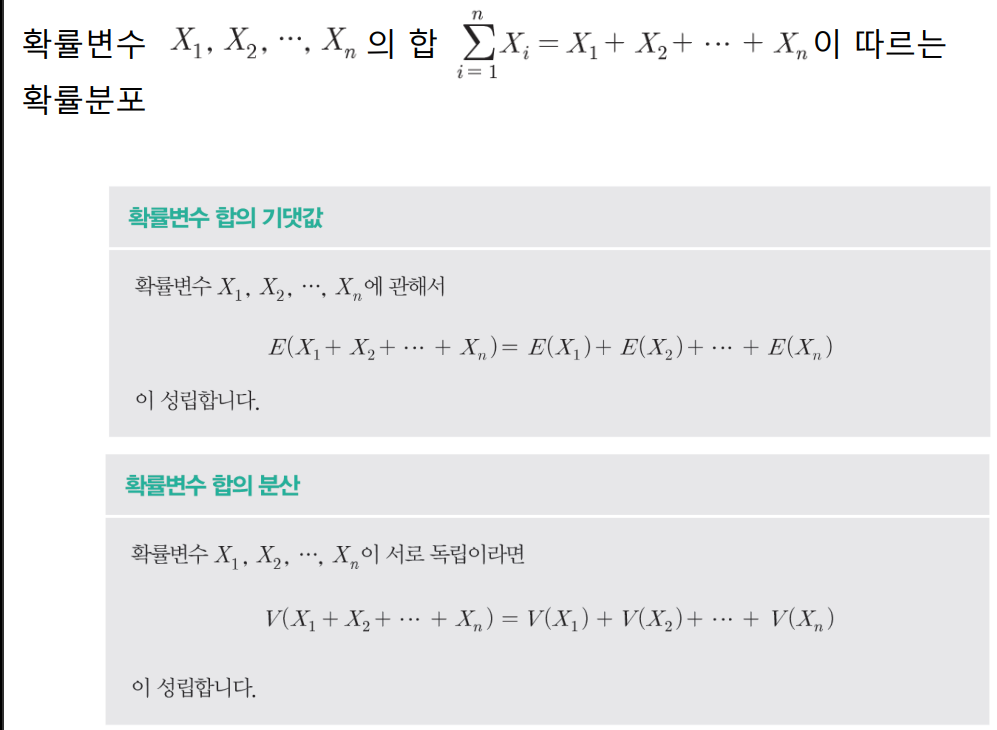

In [93]:
Image('capture_img/ch09_04.png')

# 분산은 독립이라는 전제가 붙어야 함

### 정규분포 합의 분포

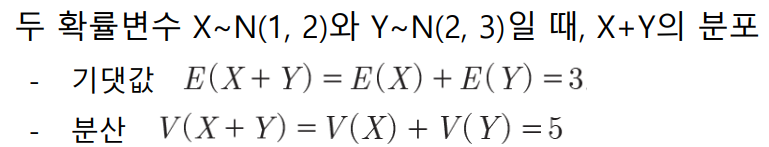

In [94]:
Image('capture_img/ch09_05.png')

In [95]:
# 위 내용을 파이선으로 확인해보자
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

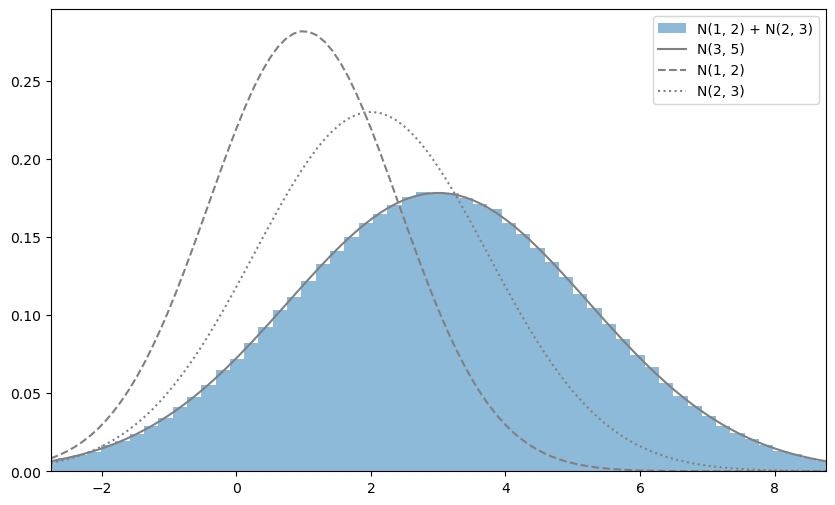

In [96]:
# 재생성 : 동일한 분포를 따르는 2개의 독립인 확률변수의 합도 동일한 확률분포

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

# 히스토그램과 밀도함수 일치 ( X + Y ~N(3,5) )

- n개의 정규분포의 합도 재생성에 의해 정규분포 (그냥 더하기만 한거니까)

### 포아송 분포의 합의 분포

In [97]:
# 서로 독립인 두 확률변수 X ~ Poi(3)과 Y ~ Poi(4) 일 때, X + Y 의 분포

rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

# X + Y의 기댓값과 분산은 모두 7
# 즉, 포아송 분포도 재생성을 가진 확률분포

(6.999034, 6.989995066843997)

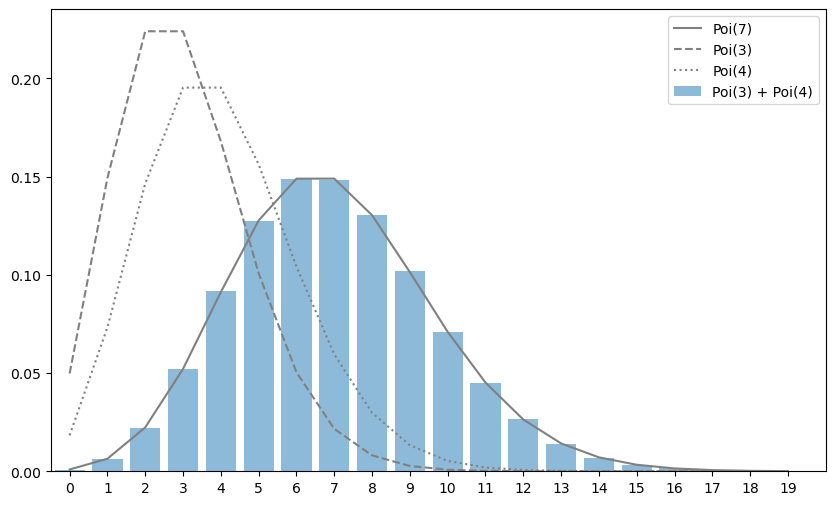

In [98]:
# X + Y ~ Poi(7) 의 표본 데이터의 히스토그램과 확률함수를 그려보자

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), density=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

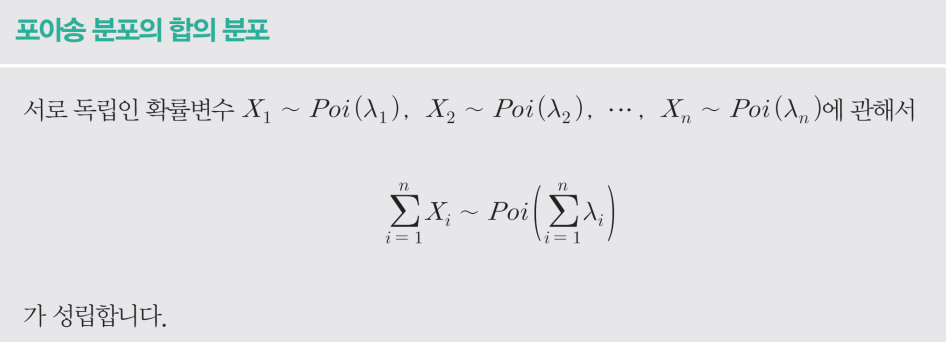

In [99]:
Image('capture_img/ch09_06.png')

### 베르누이 분포의 합의 분포

In [100]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

# 베르누이 분포는 재생성이 없음
# 베르누이 분포의 합은 이항분포 Bin(10, 0.3)

(2.999494, 2.0946717439639984)

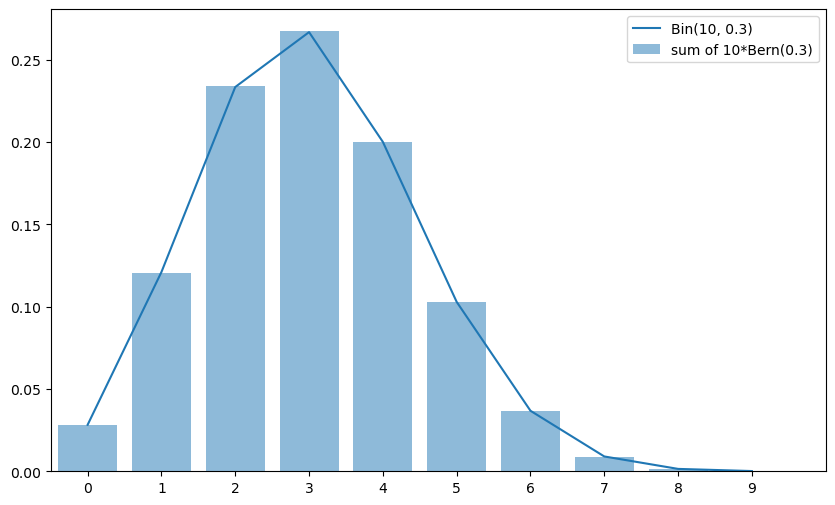

In [101]:
# 표본 데이터의 히스토그램과 함께 확률함수를 그려보자

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), density=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

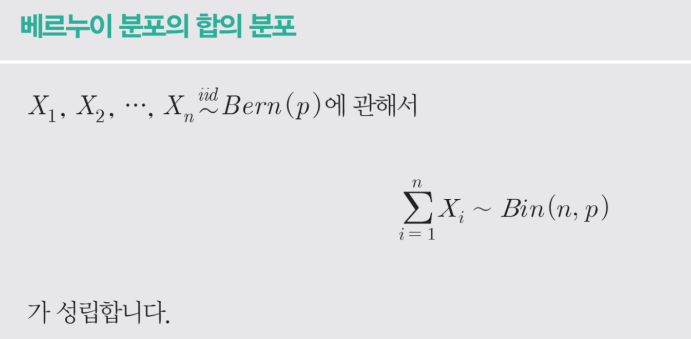

In [102]:
Image('capture_img/ch09_07.png')

## 표본평균의 분포

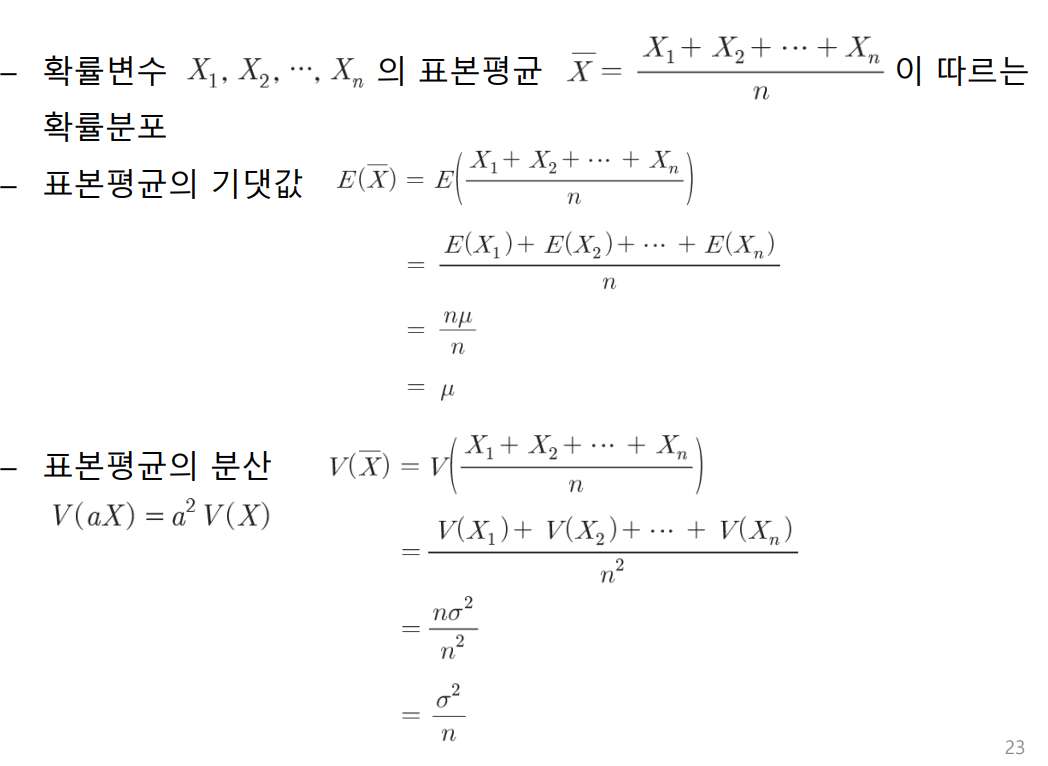

In [103]:
Image('capture_img/ch09_08.png')

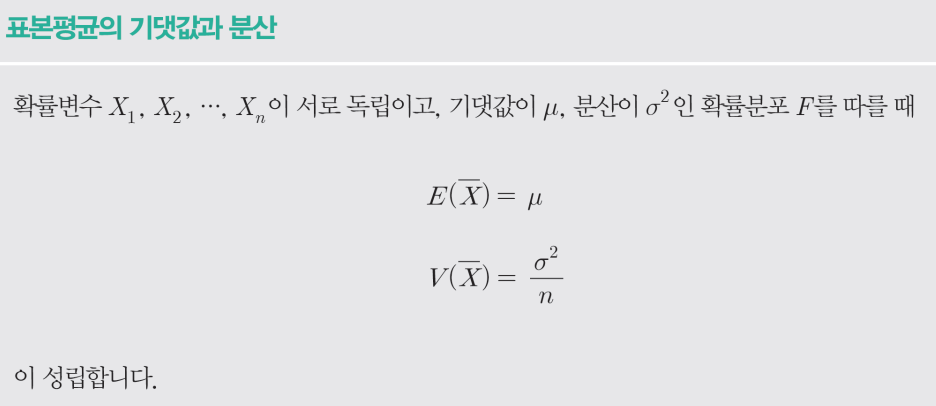

In [104]:
Image('capture_img/ch09_09.png')

### 정규분포의 표본평균 분포

In [105]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

# 평균은 1 , 분산은 0.2가 나온다

(0.9995466511402974, 0.19942119653587653)

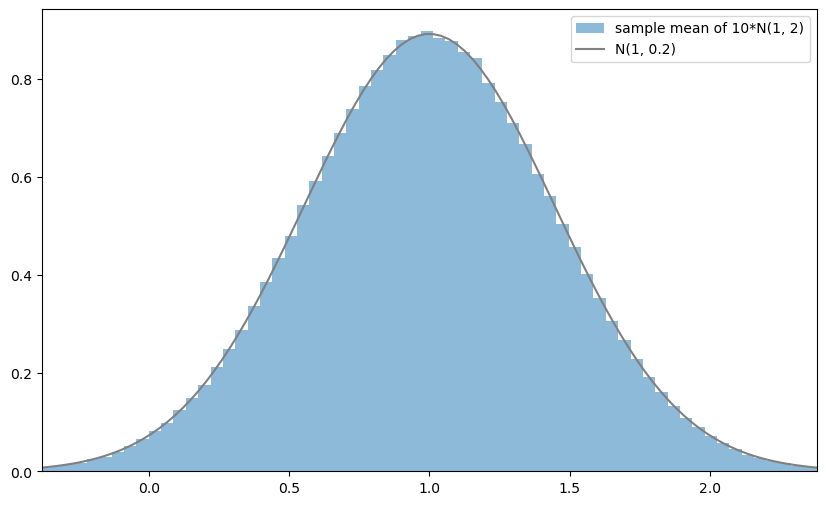

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

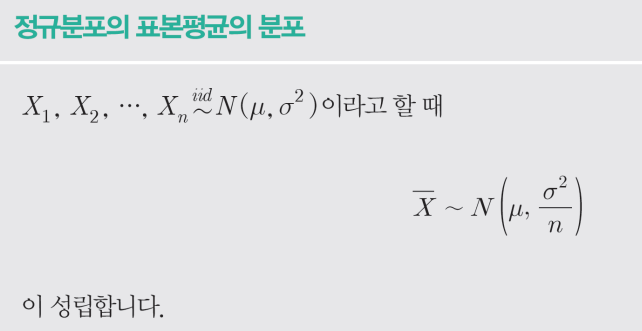

In [107]:
# 정리하자면
Image('capture_img/ch09_10.png')

### 포아송 분포의 표본평균의 분포

In [108]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

# 기댓값이 1이고 분산이 3/10이 나온다
# 기댓값과 분산이 다르다는 사실에서 알 수 있듯이, X는 이제 포아송 분포를 따르지 않음

(2.9991454, 0.30001874965884007)

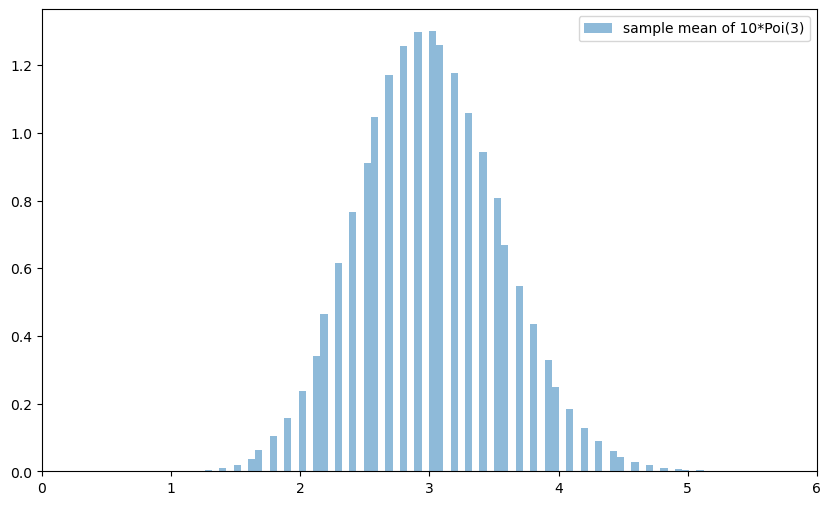

In [109]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

# 좌우대칭인 산 모양의 분포로 정규분포에 가까운 형태가 되었다.

### 중심극한정리

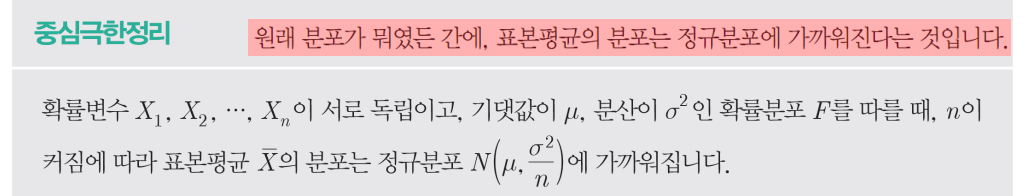

In [110]:
Image('capture_img/ch09_11.png')

In [111]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

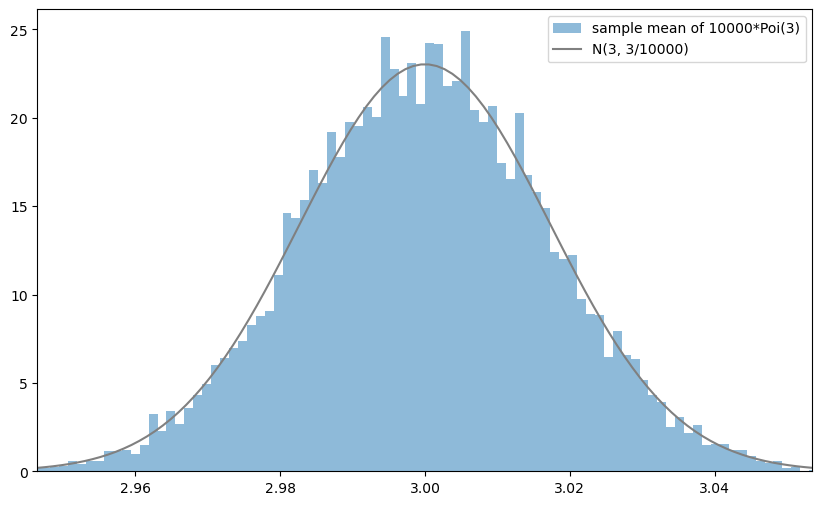

In [112]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙

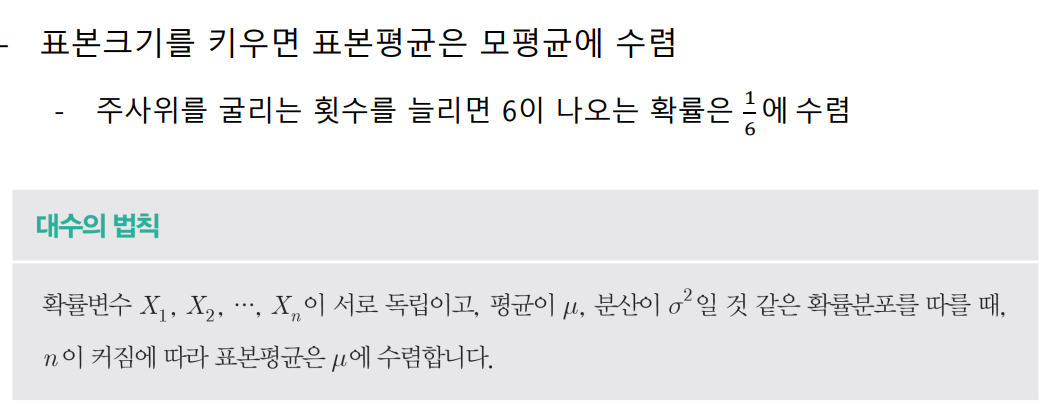

In [115]:
Image('capture_img/ch09_12.png')

In [113]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

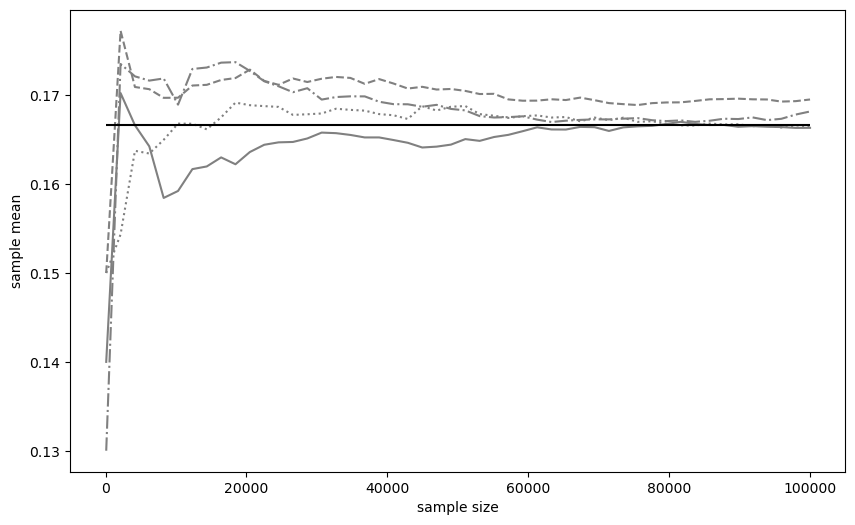

In [116]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

# 표본 크기가 작을 떄는 볁동이 있지만, 표본 크기가 커지면서 어떠한 무작위추출도 그 결과는 1/6에 가까워지고 있음을 알 수 있다.

In [117]:
print('임 소영씨 임쏘영씌 소영소영 쏘영싀 이미이이이임소오오오오여여여여여어어어엉')

임 소영씨 임쏘영씌 소영소영 쏘영싀 이미이이이임소오오오오여여여여여어어어엉


In [118]:
print('임소영씨 완전 커염져요')

임소영씨 완전 커염져요


In [120]:
for i in range(100):
    i = '임소영씨 너무 커염져요'
    print(i)

임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요
임소영씨 너무 커염져요